## Simple Linear Regression in Python

### 1) Get the dataset

In [74]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the libraries
import numpy as np
import pandas as pd

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True) #Otherwise prints in scientific format

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### 2) Separate the dep and indep variables into a numpy array

In [75]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

### 3) Split the data set

In [76]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3., random_state = 0)
print(len(X_train), len(X_test))

20 10


#### NOTE :

    We dont need feature scaling for Simple Linear Reg, as the libraries will take care of that

### 4) Estimating SLR co-efficients from training data

In [77]:
from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [78]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
print("beta = " , regressor.coef_)
print("alpha = ", regressor.intercept_)


beta =  [9345.9424]
alpha =  26816.19224403117


### 5) Predicting Test Results

In [80]:
y_pred = regressor.predict(X_test)


### 6) Tabulating results

Stacking of 1D numpy arrays column-wise is done using np.column_stack

NOTE: If you use hstack, the arrays have to be reshaped

In [81]:
res = np.column_stack((X_test[:,0],y_pred,y_test))
res

array([[     1.5   ,  40835.1059,  37731.    ],
       [    10.3   , 123079.3994, 122391.    ],
       [     4.1   ,  65134.5563,  57081.    ],
       [     3.9   ,  63265.3678,  63218.    ],
       [     9.5   , 115602.6455, 116969.    ],
       [     8.7   , 108125.8915, 109431.    ],
       [     9.6   , 116537.2397, 112635.    ],
       [     4.    ,  64199.962 ,  55794.    ],
       [     5.3   ,  76349.6872,  83088.    ],
       [     7.9   , 100649.1375, 101302.    ]])

In [82]:
pd.DataFrame(res,columns=["X_test", "y_pred", "y_test"])

,X_test,y_pred,y_test
0,1.5,40835.105909,37731.0
1,10.3,123079.399408,122391.0
2,4.1,65134.556261,57081.0
3,3.9,63265.367772,63218.0
4,9.5,115602.645454,116969.0
5,8.7,108125.891499,109431.0
6,9.6,116537.239698,112635.0
7,4.0,64199.962017,55794.0
8,5.3,76349.687193,83088.0
9,7.9,100649.137545,101302.0


## Visualization

In [83]:
%matplotlib inline 
#Needed to inline graphs
import matplotlib.pyplot as plt
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot - Provides a MATLAB-like plotting framework.

DESCRIPTION
    :mod:`~matplotlib.pylab` combines pyplot with numpy into a single namespace.
    This is convenient for interactive work, but for programming it
    is recommended that the namespaces be kept separate, e.g.::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1);
        y = np.sin(x)
        plt.plot(x, y)

FUNCTIONS
    acorr(x, hold=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Call signature::
        
            acorr(x, normed=True, detrend=mlab.detrend_none, usevlines=True,
                  maxlags=10, **kwargs)
        
        If *normed* = *True*, normalize the data by the autocorrelation at
        0-th lag.  *x* is detrended by the *detrend* callable (default no
        normalization).
        
        Data are plotted as ``plot(lags, c, **kwargs)``
    

#### Visualizing training set results

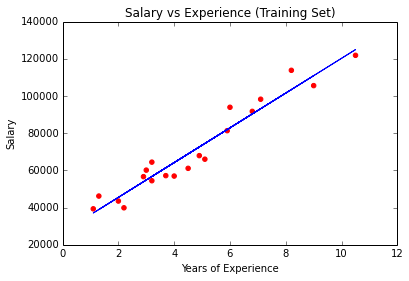

In [84]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("Salary vs Experience (Training Set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### Visualizing test set results

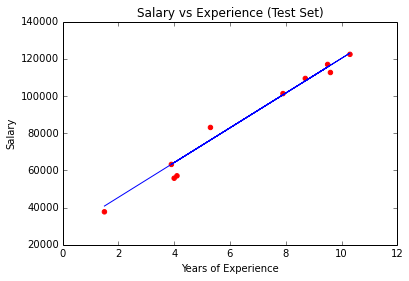

In [85]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_test, y_pred,color='blue')
plt.title("Salary vs Experience (Test Set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()